In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0


In [6]:
data.shape

(303, 14)

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data["target"].unique()

array([1, 0], dtype=int64)

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [12]:
y = data["target"]

In [13]:
y.unique()

array([1, 0], dtype=int64)

In [14]:
y.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    165
0    138
Name: target, dtype: int64


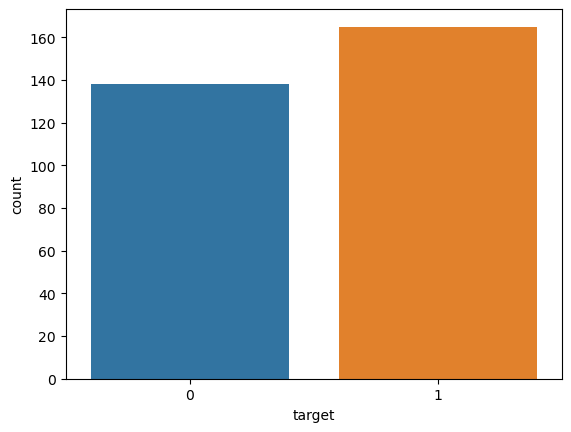

In [15]:
sb.countplot(y)

target_count = data.target.value_counts()
print(target_count)

In [16]:
#analysing the percentage of persons with and without heart disease
print("Percentage of people withour heart disease: ",str(round(target_count[0]*100/303,2)))
print("Percentage of people with heart disease: ",str(round(target_count[1]*100/303,2)))

Percentage of people withour heart disease:  45.54
Percentage of people with heart disease:  54.46


In [17]:
#analysing the features 
data["sex"].unique()

array([1, 0], dtype=int64)

In [18]:
data["sex"].describe()

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [19]:
data["sex"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: sex
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

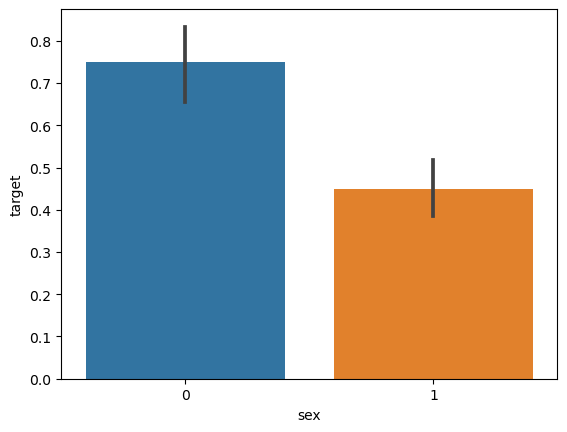

In [20]:
sb.barplot(data["sex"],y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

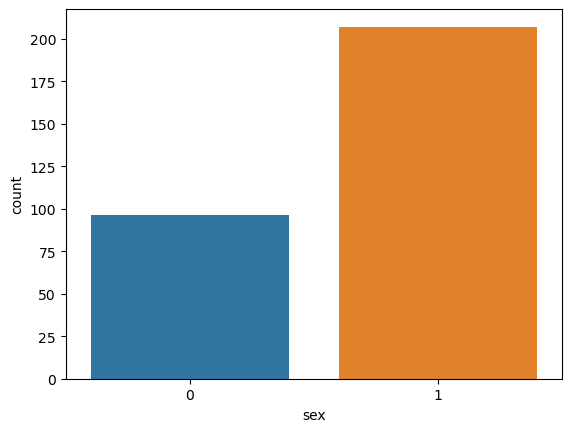

In [21]:
sb.countplot(data["sex"])

In [22]:
#analysing the chest pain type
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [23]:
data["cp"].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [24]:
data["cp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: cp
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

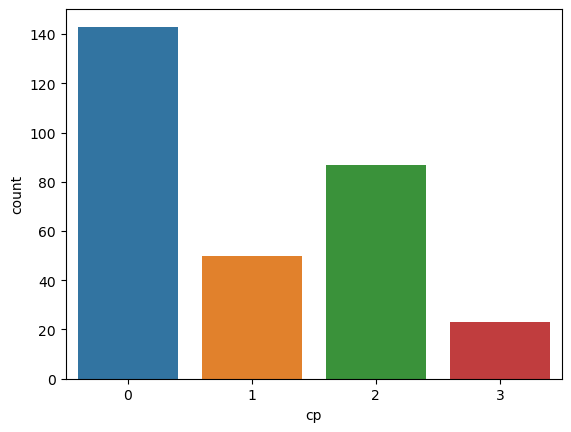

In [25]:
sb.countplot(data["cp"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

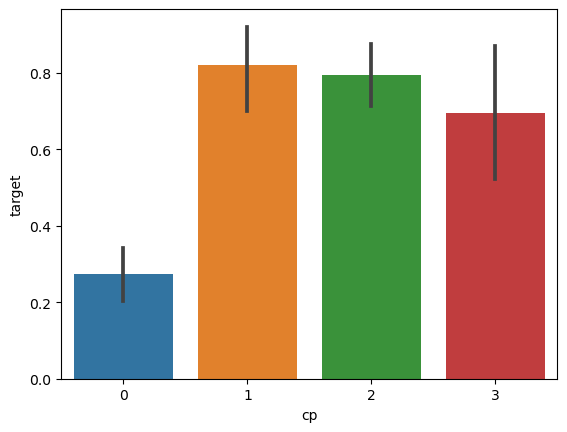

In [26]:
sb.barplot(data["cp"],y)

In [27]:
data["fbs"].unique()

array([1, 0], dtype=int64)

In [28]:
data["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [29]:
data["fbs"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: fbs
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='count'>

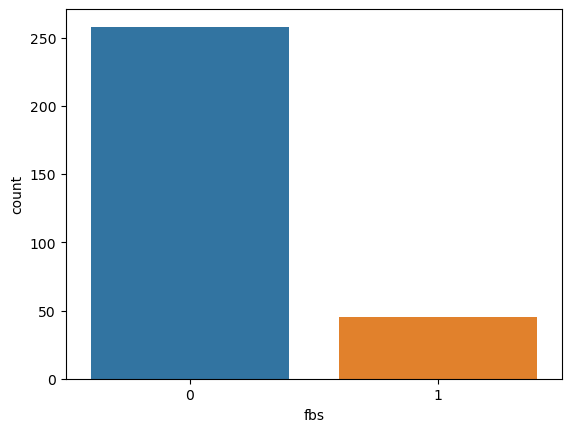

In [30]:
sb.countplot(data["fbs"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

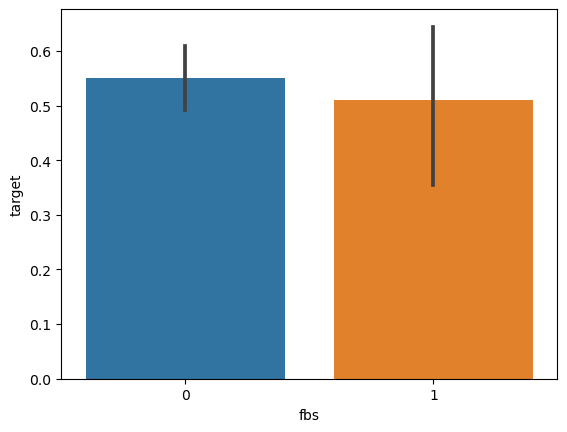

In [31]:
sb.barplot(data["fbs"],y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fbs', ylabel='Density'>

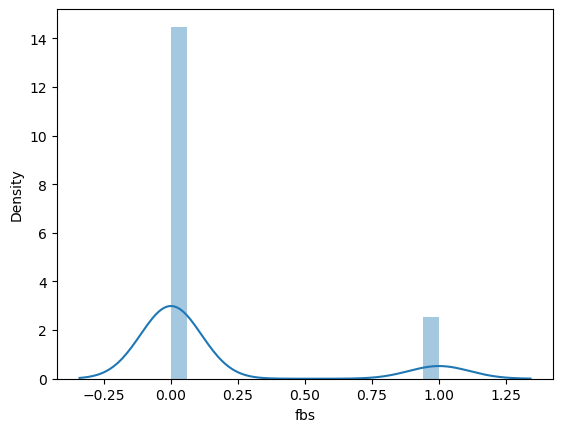

In [41]:
sb.distplot(data["fbs"])

In [33]:
#analysing the restecg feature
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

In [34]:
data["restecg"].describe

<bound method NDFrame.describe of 0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64>

In [35]:
data["restecg"].info

<bound method Series.info of 0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

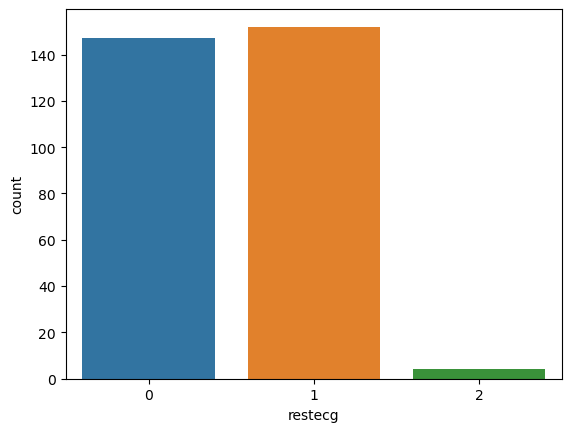

In [42]:
y = data["restecg"]
sb.countplot(y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='restecg', ylabel='Density'>

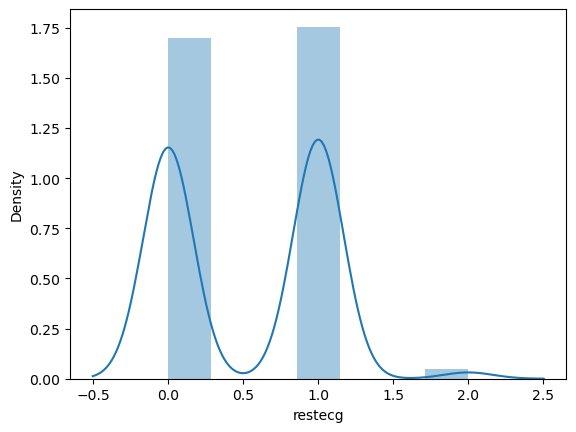

In [39]:
sb.distplot(y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

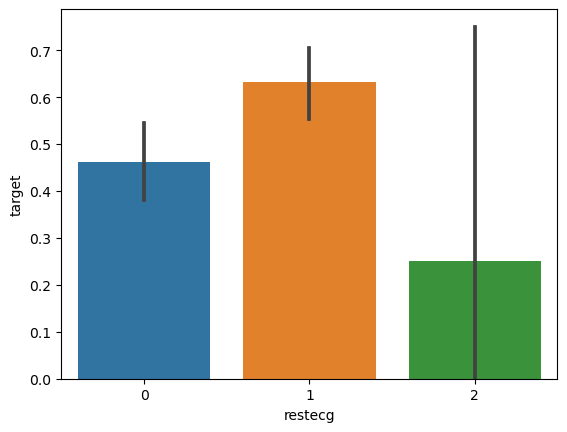

In [50]:
sb.barplot(y,data["target"])

In [52]:
#analysing the data of thalach
data["thalach"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='thalach'>

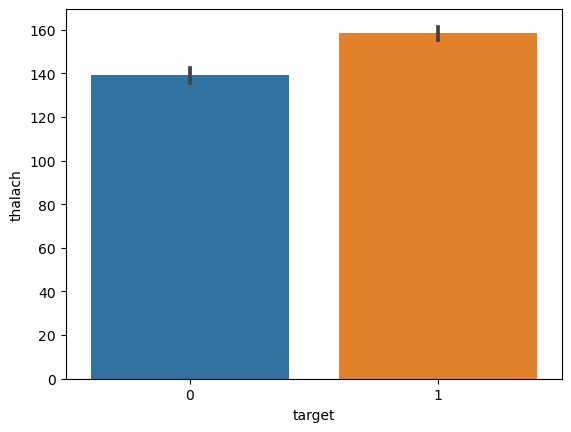

In [59]:
y = data["target"]
sb.barplot(y,data["thalach"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

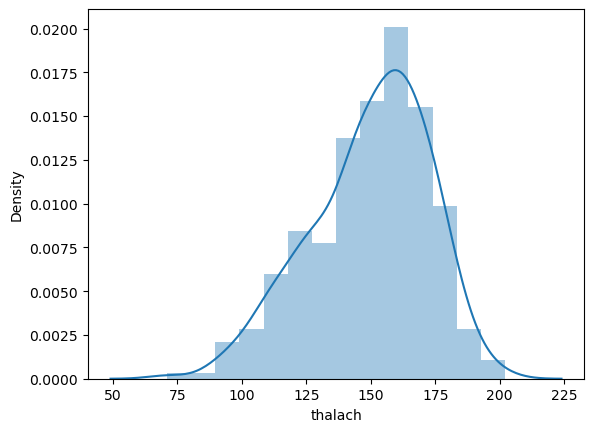

In [55]:
sb.distplot(data["thalach"])

In [60]:
data["exang"].unique()

array([0, 1], dtype=int64)

In [62]:
data["exang"].describe()

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64

In [63]:
data["exang"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: exang
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='count'>

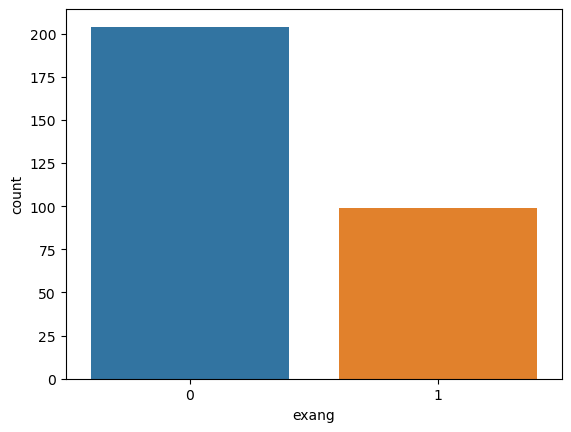

In [64]:
sb.countplot(data["exang"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

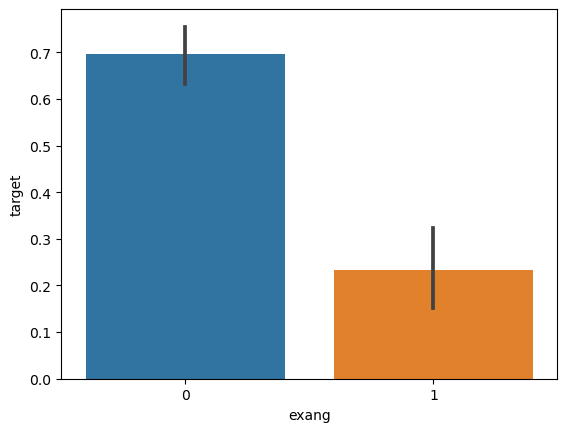

In [66]:
sb.barplot(data["exang"],y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exang', ylabel='Density'>

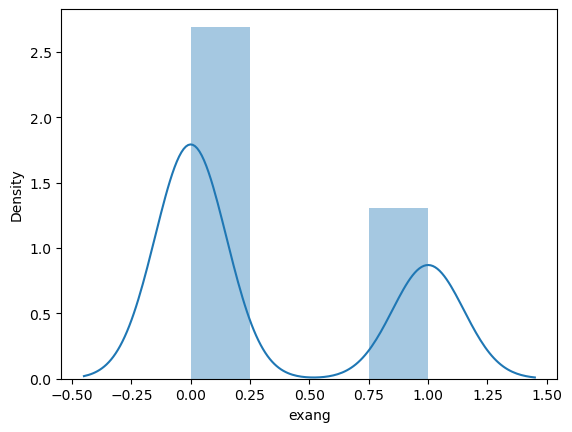

In [67]:
sb.distplot(data["exang"])

In [68]:
data["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [69]:
data["oldpeak"].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [70]:
data["oldpeak"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: oldpeak
Non-Null Count  Dtype  
--------------  -----  
303 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

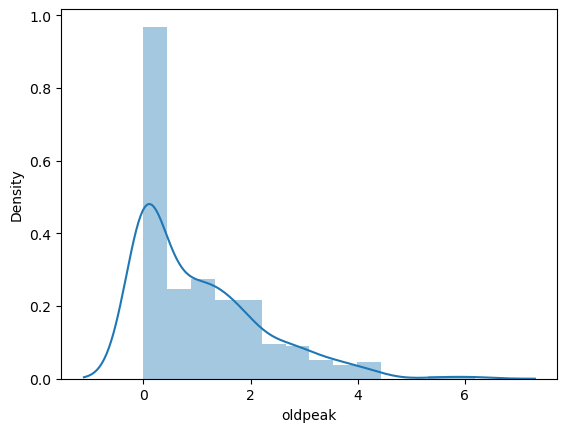

In [71]:
sb.distplot(data["oldpeak"])

In [74]:
data["slope"].unique()

array([0, 2, 1], dtype=int64)

In [75]:
data["slope"].describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

In [76]:
data["slope"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: slope
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='count'>

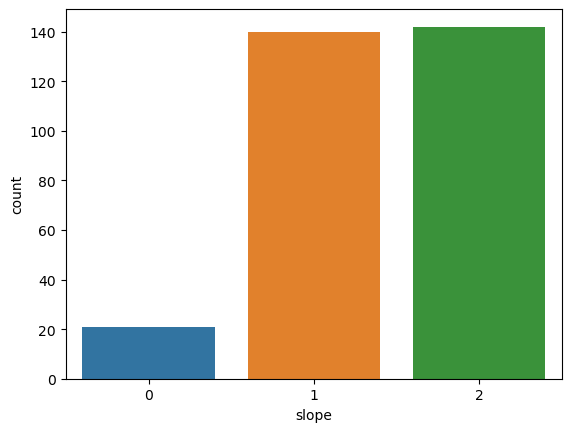

In [77]:
sb.countplot(data["slope"])

<AxesSubplot:xlabel='slope', ylabel='Density'>

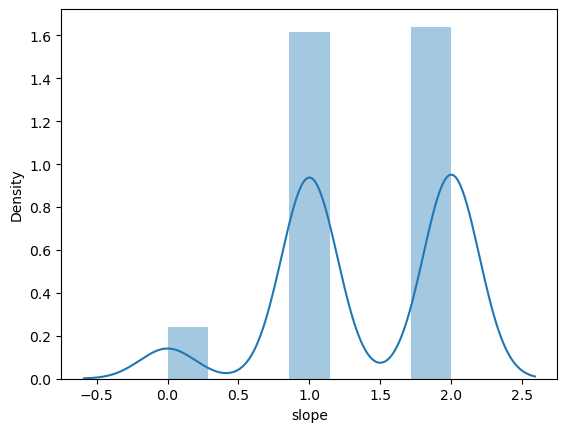

In [79]:
sb.distplot(data["slope"])

In [187]:
from sklearn.model_selection import train_test_split

x = data.drop("target",axis=1)
y = data["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [188]:
x_train.shape

(242, 13)

In [189]:
x_test.shape

(61, 13)

In [190]:
y_train.shape

(242,)

In [191]:
y_test.shape

(61,)

In [192]:
from sklearn.metrics import accuracy_score

In [193]:
#Logistic Regression

In [194]:
lr = linear_model.LogisticRegression()

In [195]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
pred = lr.predict(x_test)

In [197]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

0.08196721311475409

In [198]:
score_lr = round(accuracy_score(pred,y_test)*100,2)
print(score_lr)

91.8


In [199]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
pred = nb.predict(x_test)

In [200]:
score_nb = round(accuracy_score(pred,y_test)*100,2)
print(score_nb)

86.89


In [201]:
pred.shape

(61,)

In [202]:
from sklearn import svm
sv= svm.SVC(kernel="linear")
sv.fit(x_train,y_train)
pred = sv.predict(x_test)

In [203]:
score_svm = round(accuracy_score(pred,y_test)*100,2)
print(score_svm)

90.16


In [204]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [205]:
score_kn = round(accuracy_score(pred,y_test)*100,2)

In [206]:
print(str(score_kn)+"%")

63.93%


In [222]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0
current_accuracy=0


for x in range(200):
    dt= DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    current_accuracy = round(accuracy_score(pred,y_test)*100,2)
    if current_accuracy>max_accuracy:
        max_accuracy = current_accuracy
        best_x = x
print(max_accuracy)
print(best_x)



86.89
39


In [223]:
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)

In [224]:
score_dt = round(accuracy_score(pred,y_test)*100,2)
print(score_dt)

85.25


In [238]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy =0

for x in range(2000):
    rd = RandomForestClassifier(random_state=x)
    rd.fit(x_train,y_train)
    pred = rd.predict(x_test)
    current_accuracy = round(accuracy_score(pred,y_test)*100,2)
    if current_accuracy>max_accuracy:
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

93.44
1154


In [239]:
rd= RandomForestClassifier(random_state=best_x)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)


In [240]:
score_rd = round(accuracy_score(pred,y_test)*100,2)

In [241]:
print(score_rd)

93.44


<AxesSubplot:>

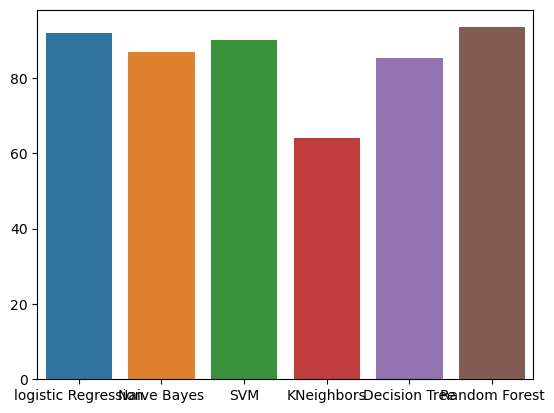

In [247]:
scores = [score_lr,score_nb,score_svm,score_kn,score_dt,score_rd]
algorithms = ["logistic Regression" , "Naive Bayes","SVM","KNeighbors","Decision Tree","Random Forest"]
sb.barplot(algorithms,scores)